In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
train_path = 'UNSW_NB15_training-set.parquet'
test_path =  'UNSW_NB15_testing-set.parquet'

In [3]:
train_data = pd.read_parquet(train_path)
test_data = pd.read_parquet(test_path)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [4]:
print("Information of Training Data: ")
print(train_data.info())

Information of Training Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sji

In [5]:
print("Features of the dataset: ")
columns_name = train_data.columns
print(columns_name)

Features of the dataset: 
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')


In [6]:
print(train_data['attack_cat'])
print(train_data['attack_cat'].cat.categories)

0            Normal
1            Normal
2            Normal
3            Normal
4            Normal
            ...    
175336      Generic
175337    Shellcode
175338      Generic
175339      Generic
175340      Generic
Name: attack_cat, Length: 175341, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
Index(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')


In [7]:
print("Null values in the features: ")
print(train_data.isnull().sum())

Null values in the features: 
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64


In [8]:
#preprocessing
print("Statistics of the dataset: ")
print(train_data.describe)

Statistics of the dataset: 
<bound method NDFrame.describe of              dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp       -   FIN      6      4     258     172   
1       0.649902   tcp       -   FIN     14     38     734   42014   
2       1.623129   tcp       -   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp       -   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
175336  0.000009   udp     dns   INT      2      0     114       0   
175337  0.505762   tcp       -   FIN     10      8     620     354   
175338  0.000009   udp     dns   INT      2      0     114       0   
175339  0.000009   udp     dns   INT      2      0     114       0   
175340  0.000009   udp     dns   INT      2      0     114       0   

                 rate         sload  ...  trans_depth  response_body_len  \
0           74.087486

Number of attacks:  119341
Attack distribution: 
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


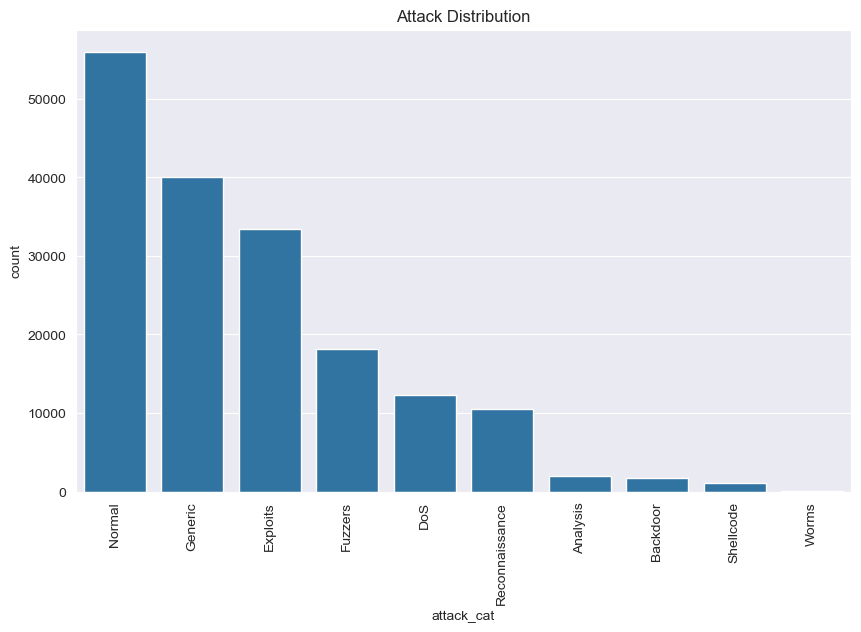

In [9]:
print("Number of attacks: ", train_data['label'].value_counts()[1])
print("Attack distribution: ")
print(train_data['attack_cat'].value_counts())
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='attack_cat', order=train_data['attack_cat'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Attack Distribution")
plt.show()

In [10]:
## Description of the categorical columns
print("Protocols: \n", train_data['proto'].cat.categories)
print("Services: \n", train_data['service'].cat.categories)
print("States: \n", train_data['state'].cat.categories)

Protocols: 
 Index(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna',
       ...
       'visa', 'vmtp', 'vrrp', 'wb-expak', 'wb-mon', 'wsn', 'xnet', 'xns-idp',
       'xtp', 'zero'],
      dtype='object', length=133)
Services: 
 Index(['-', 'dhcp', 'dns', 'ftp', 'ftp-data', 'http', 'irc', 'pop3', 'radius',
       'smtp', 'snmp', 'ssh', 'ssl'],
      dtype='object')
States: 
 Index(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'], dtype='object')


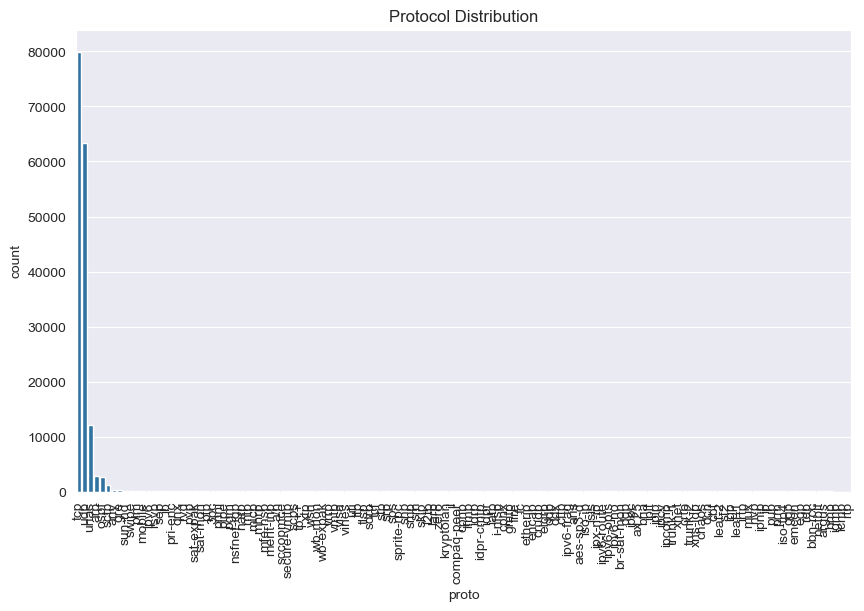

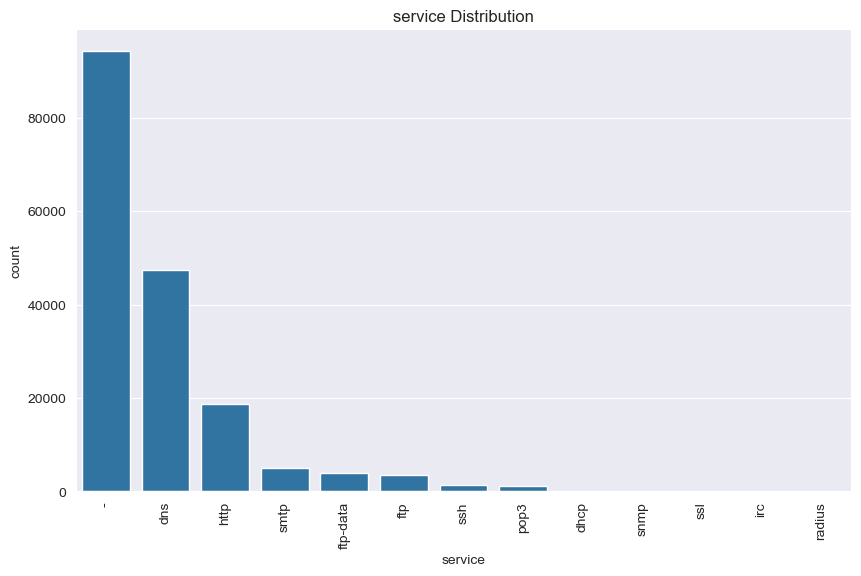

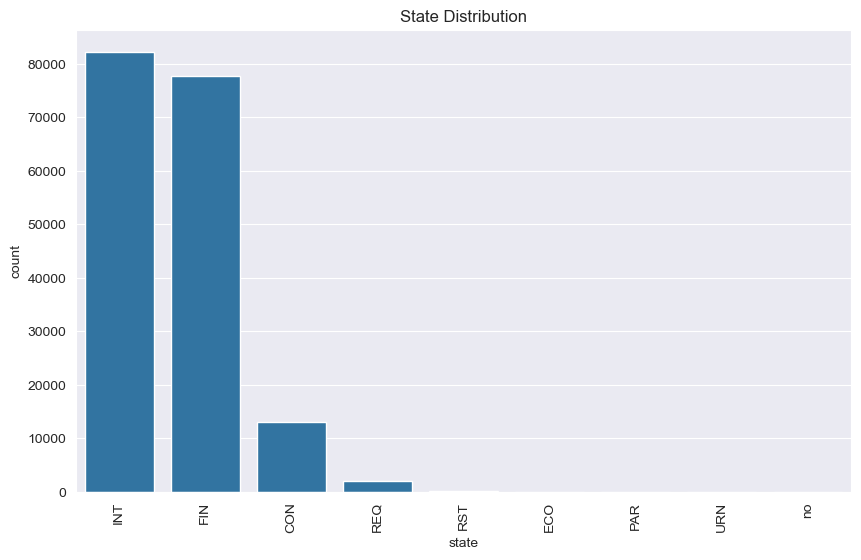

In [11]:
##knowing the distributions of each feature
## protocols
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='proto', order=train_data['proto'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Protocol Distribution")
plt.show()


## Services
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='service', order=train_data['service'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("service Distribution")
plt.show()

##States
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='state', order=train_data['state'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("State Distribution")
plt.show()

<Figure size 2000x2000 with 0 Axes>

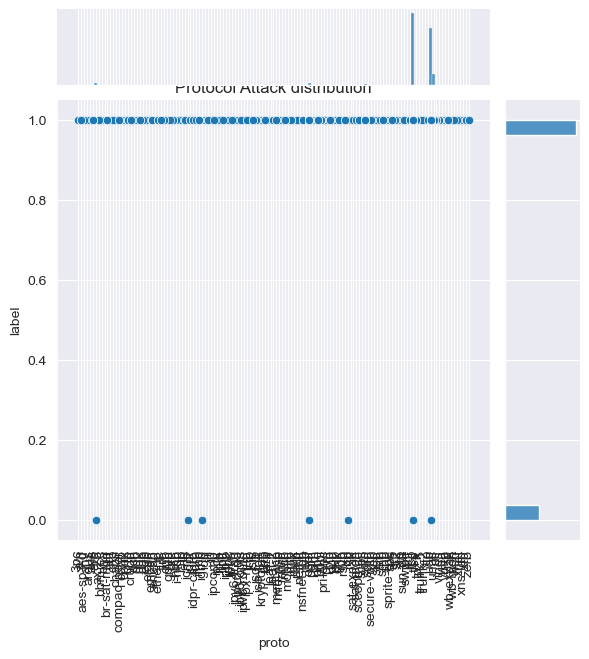

<Figure size 2000x2000 with 0 Axes>

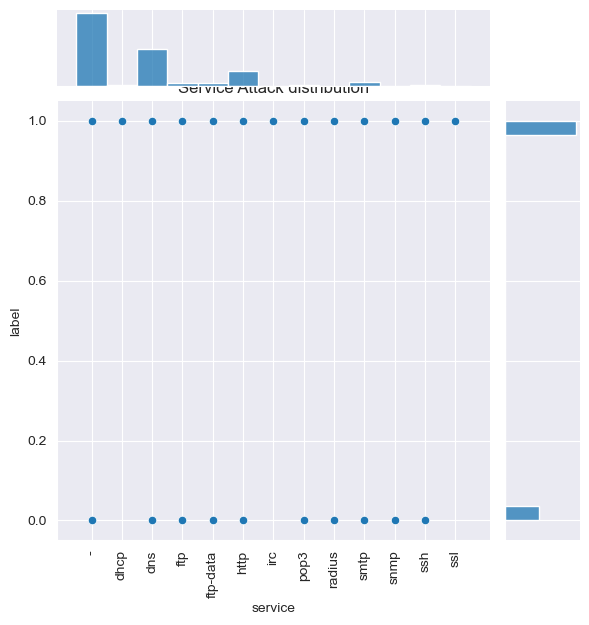

<Figure size 2000x2000 with 0 Axes>

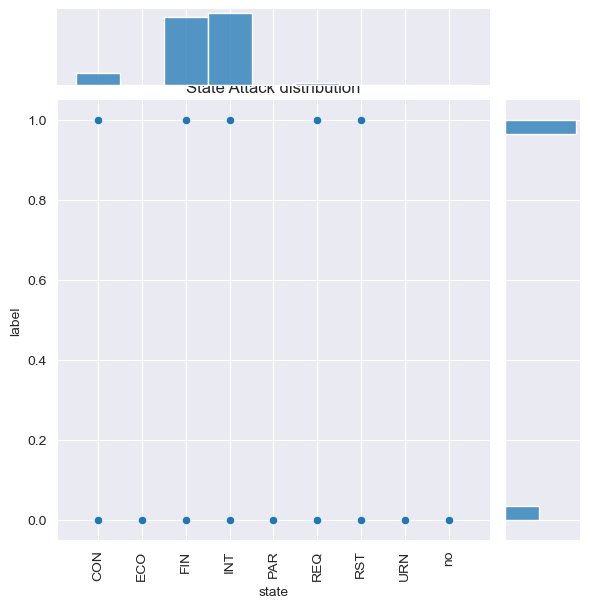

In [12]:
## Attack happened under which protocol
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'proto', y = 'label')
plt.xticks(rotation = 90)
plt.title("Protocol Attack distribution")
plt.show()

## service under which frequent attacks are occuring
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'service', y = 'label')
plt.xticks(rotation = 90)
plt.title("Service Attack distribution")
plt.show()

#states in which attacks happened
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'state', y = 'label')
plt.xticks(rotation = 90)
plt.title("State Attack distribution")
plt.show()



In [13]:
print(train_data.head())

        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                 1            

In [16]:
print(train_data['attack_cat'])
prediction = 6
# original_category = label_encoder.inverse_transform([prediction])[0]
# print(original_category)

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int32


In [ ]:
label_encoder = LabelEncoder()
train_data['attack_cat'] = label_encoder.fit_transform(train_data['attack_cat'])
train_data['proto'] = label_encoder.fit_transform(train_data['proto'])
train_data['service'] = label_encoder.fit_transform(train_data['service'])
train_data['state'] = label_encoder.fit_transform(train_data['state'])

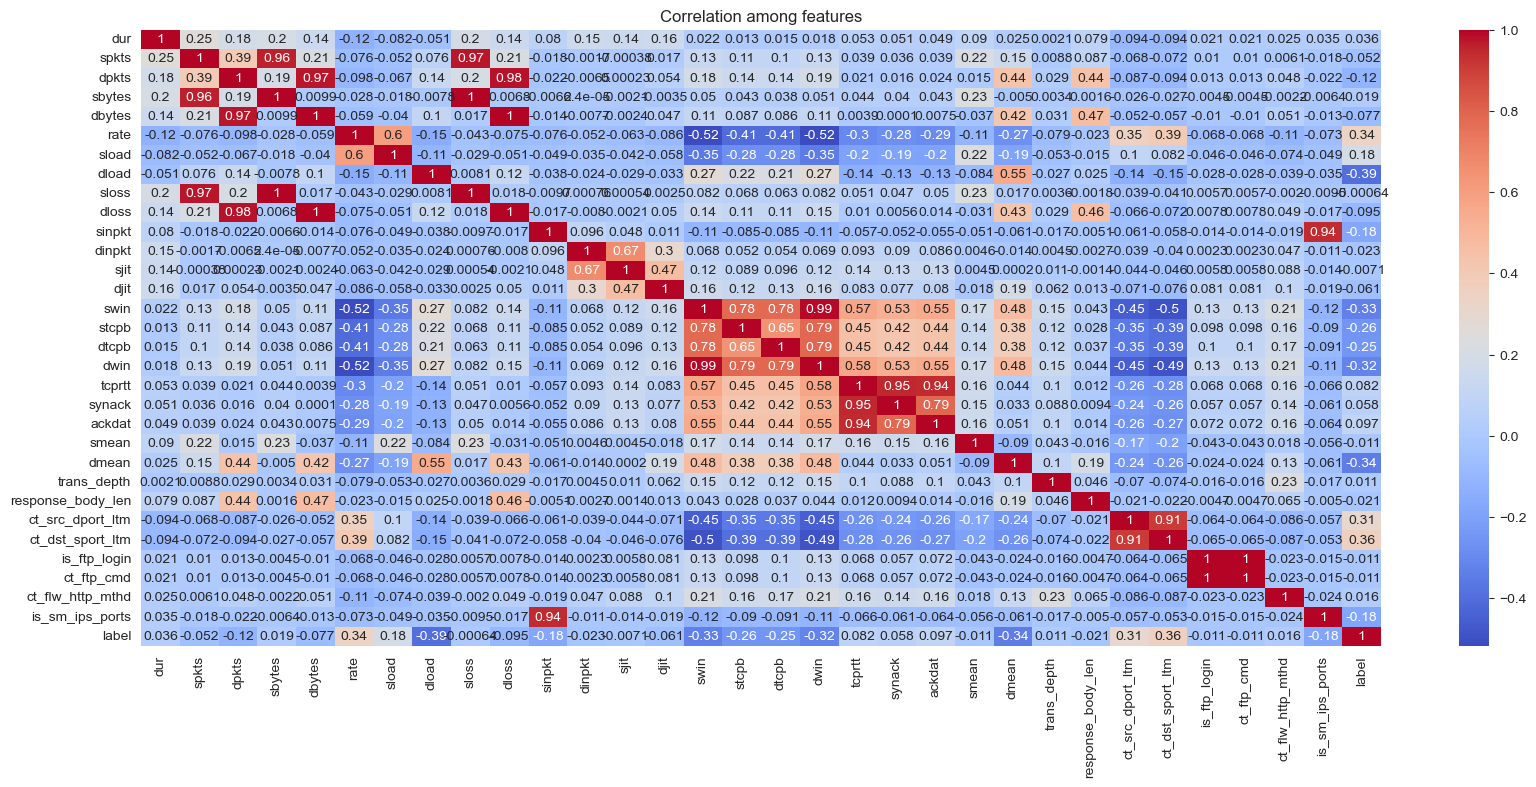

In [66]:
numerical_features = train_data.select_dtypes(include = [np.number]).columns
numerical_data = train_data[numerical_features]

cor_mat = numerical_data.corr()
#How numeric features are correlated with each other
plt.figure(figsize=(20,8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.xticks(rotation = 90)
plt.title("Correlation among features")
plt.show()

In [82]:
numerical_features1 = test_data.select_dtypes(include = [np.number]).columns
numerical_data1 = test_data[numerical_features]

In [83]:
X = numerical_data.drop('label', axis=1)
y = numerical_data['label']
x_test = numerical_data1.drop('label', axis = 1)
y_test = numerical_data1['label']
#x_train, x_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=27)
model = RandomForestClassifier(n_estimators=100, random_state=27)
model.fit(X,y)
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8669533109847932
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83     37000
           1       0.82      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.86     82332
weighted avg       0.88      0.87      0.86     82332



In [36]:
X = train_data.drop(columns=['label', 'attack_cat'])
y = train_data['attack_cat']

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

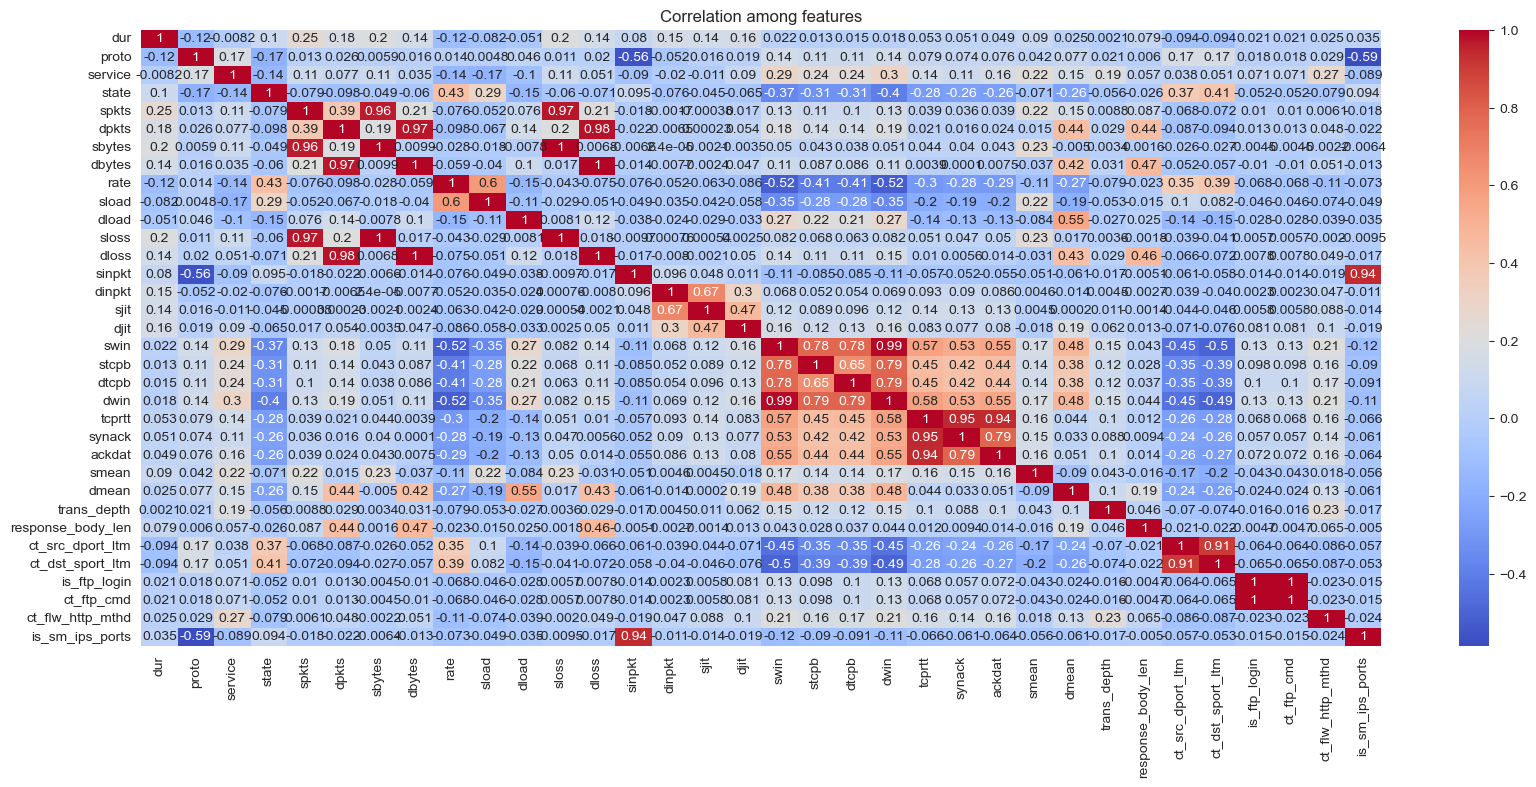

In [35]:
corr_mat = X.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.xticks(rotation = 90)
plt.title("Correlation among features")
plt.show()

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=23)
model.fit(X_sc,y)

X_test = test_data.drop(columns=['label','attack_cat'])
y_test = test_data['attack_cat']
X_test = scaler.fit_transform(X_test)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.5296482534130107
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.88      0.01      0.02      4089
           3       0.29      0.93      0.45     11132
           4       0.20      0.22      0.21      6062
           5       1.00      0.51      0.67     18871
           6       0.73      0.60      0.66     37000
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.53     82332
   macro avg       0.31      0.23      0.20     82332
weighted avg       0.66      0.53      0.53     82332



d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


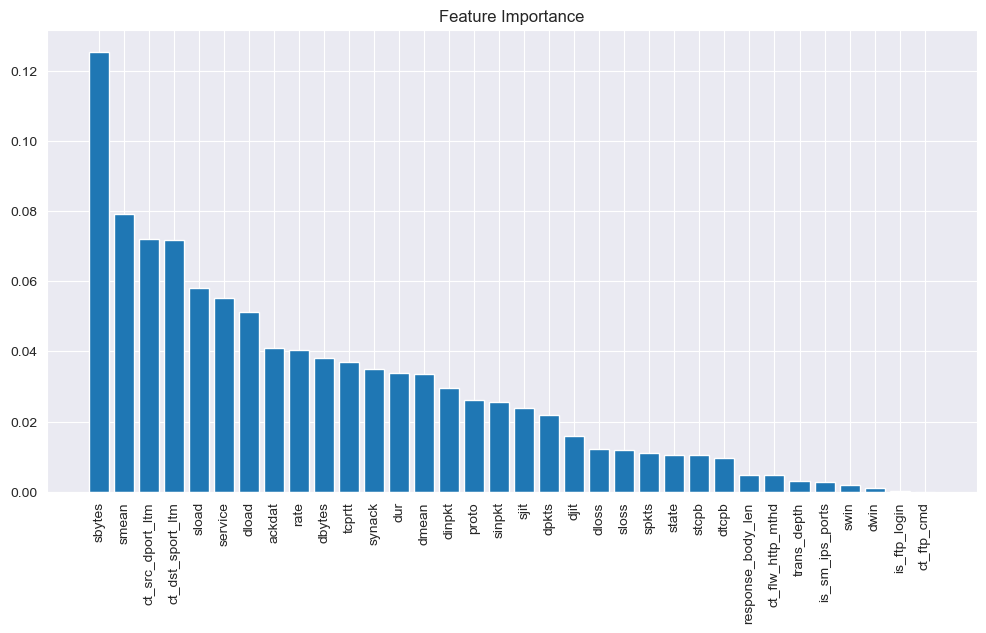

In [39]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()